In [5]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [9]:
#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [11]:
#libraries for model evalution
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score, precision_score

## Dataset Loading

In [16]:
#load Dataset
airline_df=pd.read_excel(r"C:\Users\UNIQUE\Desktop\Code Work 2\data_airline_reviews.xlsx")

## Dataset First View

In [19]:
# Dataset first look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset Rows and Columns Count

In [22]:
#Dataset Rows and Columns Count
print(airline_df.shape)

(131895, 17)


Total 131895 rows and 17 columns are present in our dataset

## Dataset Information

In [29]:
#Datset Information
print(airline_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

## Checking Duplicate Values

In [32]:
#Dataet duplicate value counts
airline_df.duplicated().value_counts()

True     70711
False    61184
Name: count, dtype: int64

In [36]:
#getting duplicate values
print(f" Duplicated data count = {airline_df[airline_df.duplicated()].shape[0]}")
airline_df[airline_df.duplicated()]

 Duplicated data count = 70711


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#droping the null values
airline_df.drop_duplicates(inplace=True)

In [40]:
#count dupicate values 
airline_df.duplicated().sum()

0

## Missing values / Null values

In [45]:
#count missing values / null values
print(airline_df.isnull().sum())

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64


<Axes: >

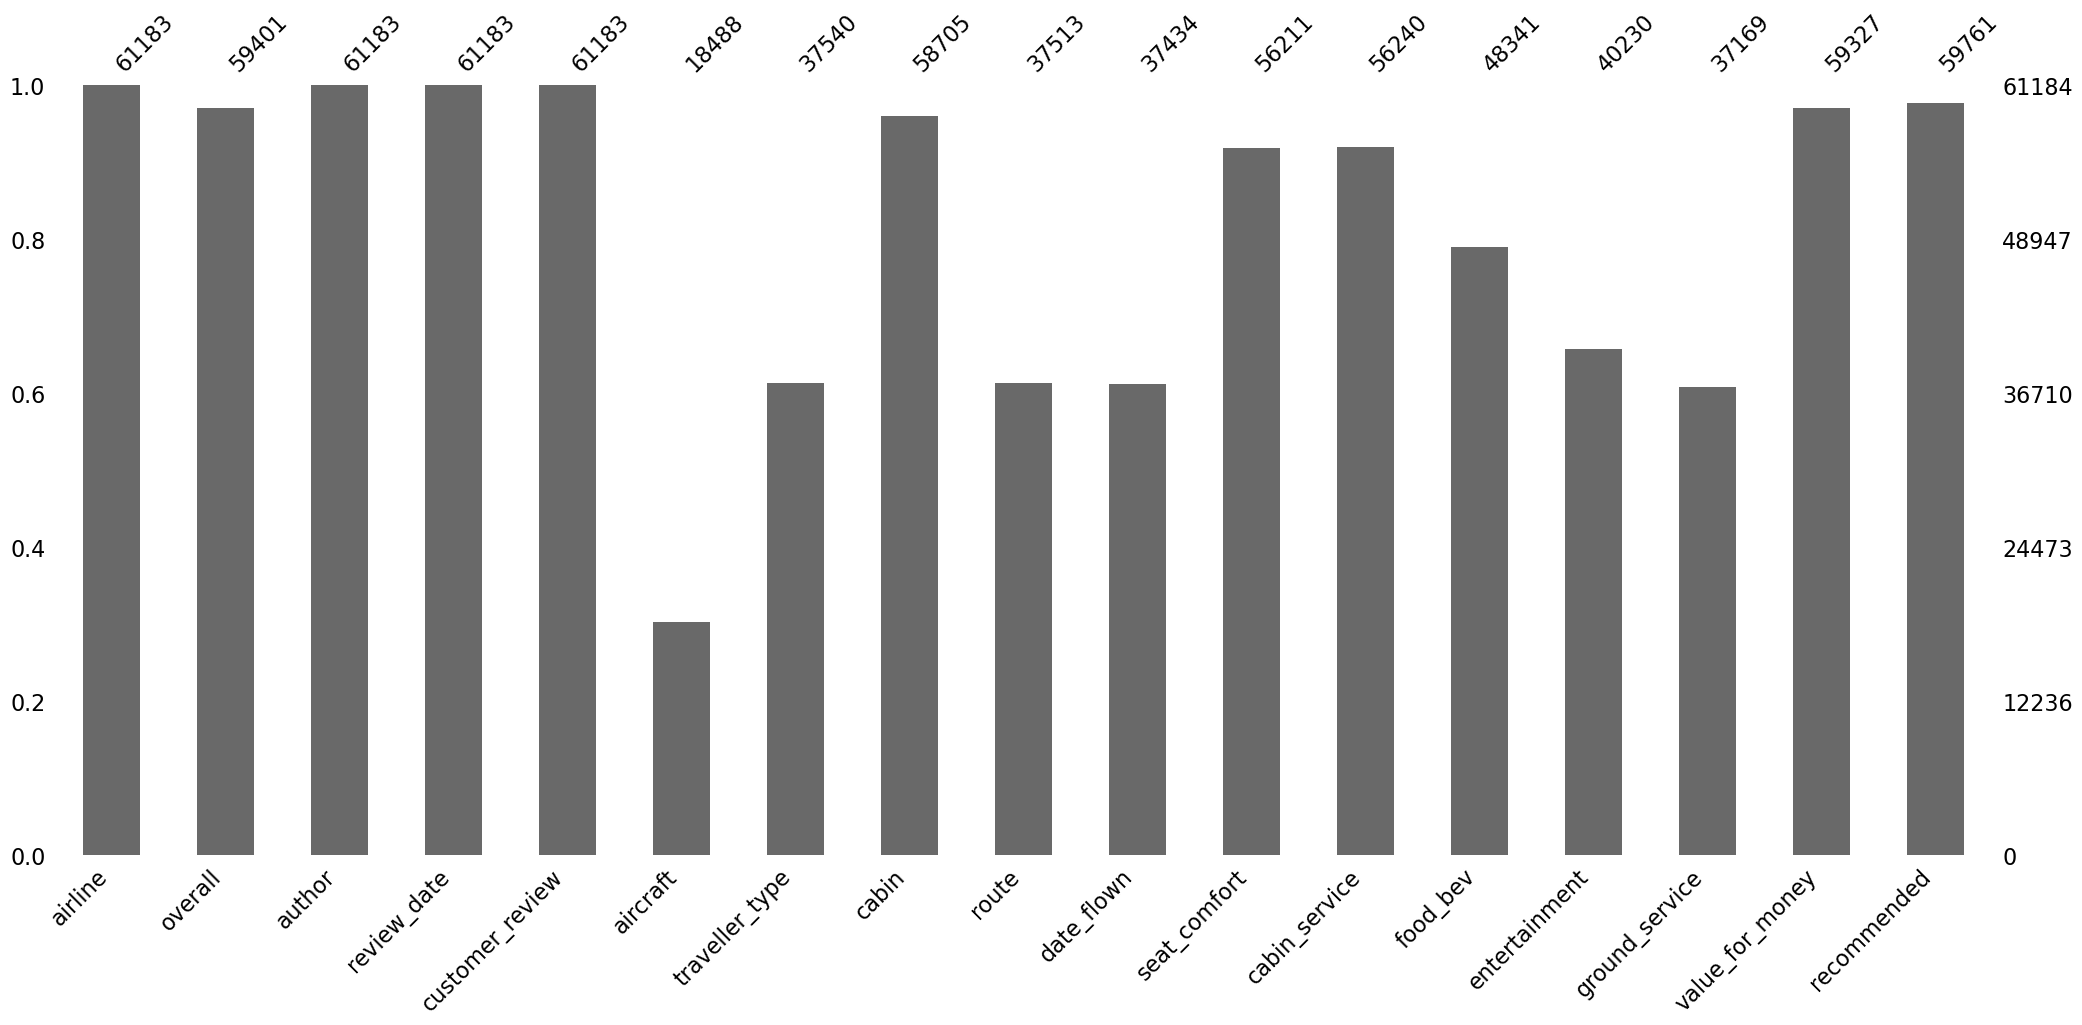

In [47]:
#visulization of missing values
msno.bar(airline_df)

As we can see above graph, so many missing values are present in dataset.

## What did you know about your dataset?

There are 131895 total observation with 17 different features.
All the Feature like aircraft,author and airline has null values.
There are duplicate values i.e., 70711 duplicate data.

## 2.Understanding Your Variables

In [53]:
#Dataset columns
airline_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_flown,37434,63,August 2015,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Decription

airline:Name of the airline

• overall : Overall point is given to the trip between 1 to 10.

• author : Author of the trip

• review_date : Date of the Review

• customer_review : Review of the customers in free text format

• aircraft : Type of the aircraft

• traveller_type : Type of traveller(e.g. business,lesisure)

• cabin : Cabin at the flight date flowan: Flight date

• seat_comfort : Rated between 1-5

• cabin_service : Rated between 1-5

• food_bev : Rated between 1-5

• entertainment : Rated between 1-5

• ground_service : Rated between 1-5

• value_for_money : Rated between 1-5

• recommended : Binary, target variable

## Check Unique value for each variable

In [63]:
#Unique values for each variable
for i in airline_df.columns.tolist():
    print(f"Number of unique value in {i} is {airline_df[i].nunique()}")

Number of unique value in airline is 81
Number of unique value in overall is 10
Number of unique value in author is 44069
Number of unique value in review_date is 3015
Number of unique value in customer_review is 61172
Number of unique value in aircraft is 2088
Number of unique value in traveller_type is 4
Number of unique value in cabin is 4
Number of unique value in route is 24549
Number of unique value in date_flown is 63
Number of unique value in seat_comfort is 5
Number of unique value in cabin_service is 5
Number of unique value in food_bev is 5
Number of unique value in entertainment is 5
Number of unique value in ground_service is 5
Number of unique value in value_for_money is 5
Number of unique value in recommended is 2


## 3.EDA

**Chart 1:Displot for distribution**

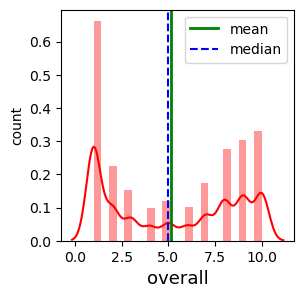

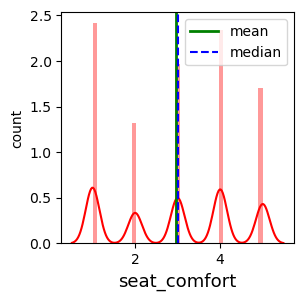

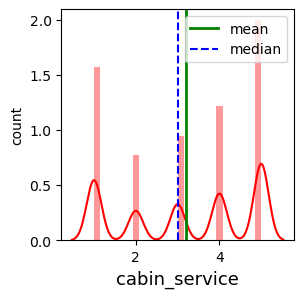

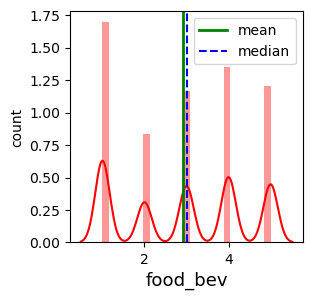

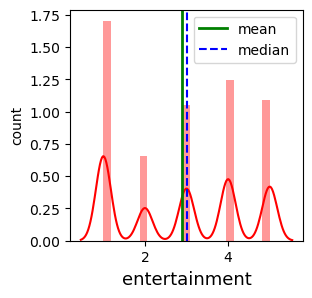

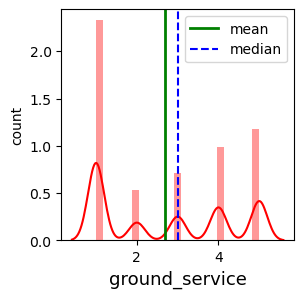

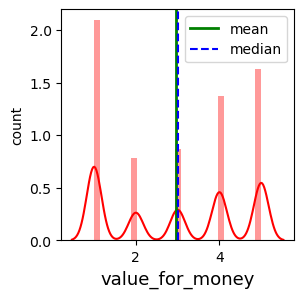

In [69]:
#visulization of distribution
for col in ['overall',   'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']:
    plt.figure(figsize=(3,3))
    sns.distplot(airline_df[col], color="r")
    plt.xlabel(col, fontsize=13)
    plt.ylabel("count")
    
    # Plotting the mean and the median.
    plt.axvline(airline_df[col].mean(), color="green", linewidth=2, label="mean")
    plt.axvline(airline_df[col].median(), color="blue", linestyle = "dashed", linewidth=1.5, label="median")
    plt.legend(bbox_to_anchor=(1.0, 1), loc="upper right")
    plt.show()
    

Most of the passenger give overall rating around 4.5.
Most of the people give seat comfort service rating around 3.
Most of the people give cabin_service rating around 3.1
Most of the people give food_bev service rating around 3
Most of the people give entertainment service rating around 2.9
Most of the people give ground service rating around 3
Most of the people give value_for_money rating around 3